### Use Credit Card dataset and perform the following:
1. Implement Pre-processing functions
    - Check for NULL values in the dataset. If any NULL value is present then treat it accordingly.
    - extract only feature columns from the dataset.
2. Determine the number of clusters using dendogram. Use ward linkage method.
3. Apply agglomerative clustering using ward linkage method.
4. Form the clusters.
5. Visualize the clusters formed by agglomerative clustering.
6. Evaluate the quality of clusters.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/credit_card.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data = data.dropna(how='any')  

In [7]:
data.shape

(8636, 18)

In [8]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### From above results no NULL value observed in dataset.

In [9]:
data = data.drop('CUST_ID', axis=1)

In [10]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(data)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, random_state=1)

pca.fit(X_scaled)
pca.explained_variance_ratio_.sum()

0.9197695792289546

In [15]:
from scipy.cluster.hierarchy import linkage

lnk = linkage(X_scaled, method='ward')

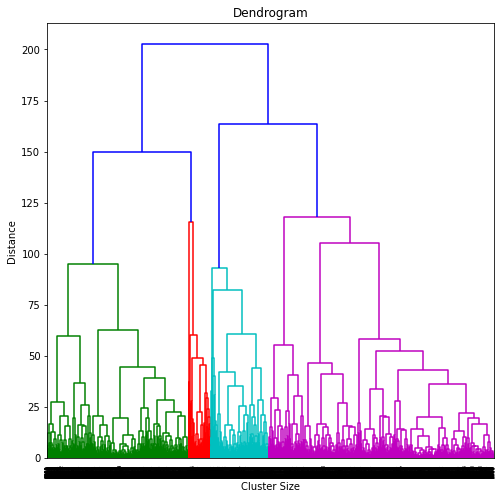

In [16]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(8,8))
dendrogram(lnk,  orientation='top')
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [17]:
# Helper function for plotting

def plot_3d_graph(X_scaled, cluster_labels):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], s=50, alpha=0.5, c=cluster_labels, cmap='rainbow')
    ax.set_xlabel('BALANCE')
    ax.set_ylabel('BALANCE_FREQUENCY')
    ax.set_zlabel('PURCHASE')

    plt.show()

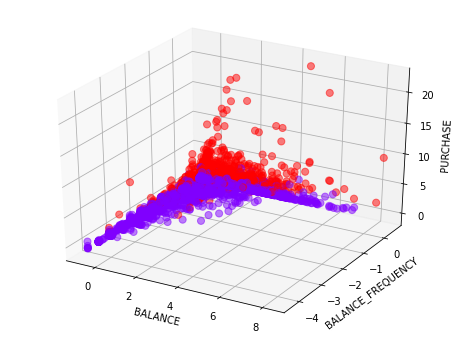

In [18]:
from sklearn.cluster import AgglomerativeClustering

# n_clusters=2
agc = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = agc.fit_predict(X_scaled)

plot_3d_graph(X_scaled, cluster_labels)

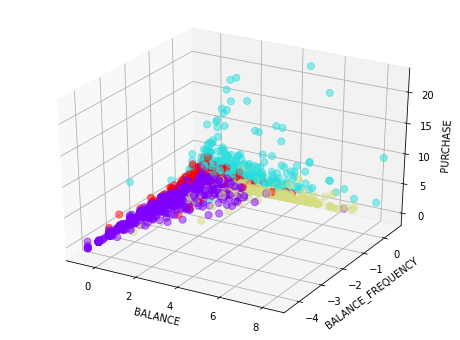

In [19]:
from sklearn.cluster import AgglomerativeClustering

# n_clusters=4
agc = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = agc.fit_predict(X_scaled)

plot_3d_graph(X_scaled, cluster_labels)

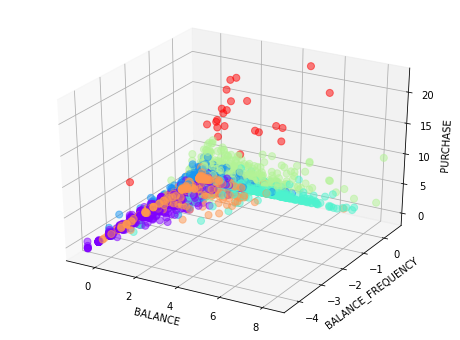

In [20]:
from sklearn.cluster import AgglomerativeClustering

#n_clusters=6
agc = AgglomerativeClustering(n_clusters=6, linkage='ward')
cluster_labels = agc.fit_predict(X_scaled)

plot_3d_graph(X_scaled, cluster_labels)

### Evaluating cluster quality using Silhouette

In [21]:
from sklearn.metrics import silhouette_score 

k = range(2,12)
sil_scr = []

for x in k:
    ac = AgglomerativeClustering(n_clusters = x,  affinity='euclidean', linkage='ward') 
    sil_scr.append(silhouette_score(X_scaled, ac.fit_predict(X_scaled)))

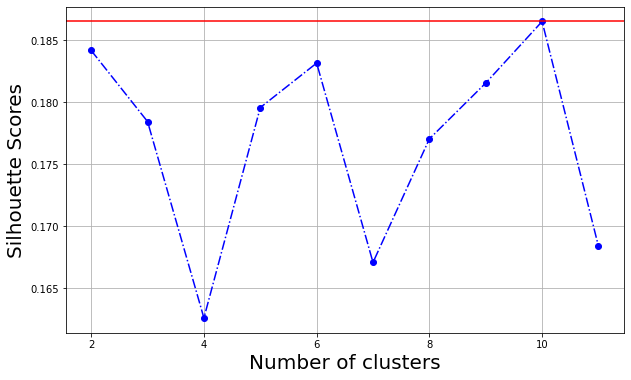

In [22]:
plt.figure(figsize=(10,6))
plt.plot(k, sil_scr, 'bo-.')
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silhouette Scores', fontsize = 20)
plt.axhline(np.max(sil_scr), color="red")
plt.grid()
plt.show()

In [23]:
print("Max Silhouette score of '{0}' at clusters = {1}".format(np.max(sil_scr), k[np.argmax(sil_scr)]))

Max Silhouette score of '0.1865256797594413' at clusters = 10
